In [10]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from importlib import reload
import transistor_count
reload(transistor_count)
from transistor_count import product_list, Product, product_type

In [11]:
#e = pl.Enum(ProductType)
df = pl.DataFrame({
        "name": [p.name for p in product_list],
        "product_type": [p.product_type for p in product_list],
        "year": [p.year for p in product_list],
        "transistor_count": [p.transistor_count for p in product_list],
        "manufacturer": [p.manufacturer for p in product_list]
    },
    schema_overrides={
        "product_type": product_type
    }
)

In [12]:
df

name,product_type,year,transistor_count,manufacturer
str,enum,i64,i64,str
"""Intel 4004 (4-bit, 16-pin)""","""Desktop CPU""",1971,2250,"""Intel"""
"""TMX 1795 (8-bit, 24-pin)""","""Desktop CPU""",1971,3078,"""Texas Instruments"""
"""Intel 8008 (8-bit, 18-pin)""","""Desktop CPU""",1972,3500,"""Intel"""
"""NEC μCOM-4 (4-bit, 42-pin)""","""Mobile CPU""",1973,2500,"""NEC"""
"""Toshiba TLCS-12 (12-bit)""","""Mobile CPU""",1973,11000,"""Toshiba"""
…,…,…,…,…
"""Navi 32 RDNA3""","""Discrete GPU""",2023,28100000000,"""AMD"""
"""Navi 33 RDNA3""","""Discrete GPU""",2023,13300000000,"""AMD"""
"""Aqua Vanjaram CDNA3""","""Discrete GPU""",2023,153000000000,"""AMD"""


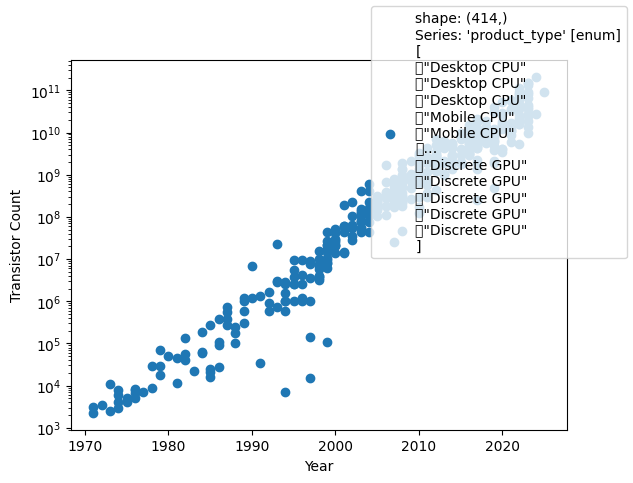

In [13]:
fig, ax = plt.subplots()
ax.scatter(df["year"], df["transistor_count"], label=df["product_type"])
ax.set_ylabel("Transistor Count")
ax.set_xlabel("Year")
ax.semilogy()
fig.legend()